# 4. Logistic Regression

## 공부시간에 따른 자격증 시험 합격 가능성 (불합격 = 0, 합격 = 1)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('LogisticRegressionData.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

### 데이터 세트 분리

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### 학습 (로지스틱 회귀 모델)

In [5]:
from sklearn.linear_model import LogisticRegression    # 로지스틱회귀 클래스 불러오기
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### 6시간 공부했을 때 합불 여부 예측

In [6]:
classifier.predict([[6]])   # 결과 1 : 합격할 것으로 예측

array([1], dtype=int64)

#### 확률정보 불러오기

In [8]:
classifier.predict_proba([[6]])    # 합격할 확률정보 출력
# 불합격할 확률 14%, 불합격할 확률 86%

array([[0.14150735, 0.85849265]])

### 4시간 공부했을 때 합불 여부 예측

In [7]:
classifier.predict([[4]])   # 결과 0 : 불합격할 것으로 예측

array([0], dtype=int64)

#### 확률정보 불러오기

In [10]:
classifier.predict_proba([[4]])    # 합격할 확률정보 출력
# 불합격할 확률 62%, 불합격할 확률 38%

array([[0.6249966, 0.3750034]])

### 분류 결과 예측 (테스트 세트 이용)

In [11]:
y_pred = classifier.predict(X_test)
y_pred    # 예측 값

array([1, 0, 1, 1], dtype=int64)

In [13]:
y_test   # 실제 값(테스트 세트)

array([1, 0, 1, 0], dtype=int64)

In [14]:
X_test    # 실제 값 1 0 1 0 에 해당하는 공부시간 정보 (테스트 세트)

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

### 모델 평가

In [16]:
classifier.score(X_test, y_test)    # 모델 평가
# 회귀 모델과는 달리, 분류 모델은 점수 계산이 굉장히 명확하다
# 전체 테스트 세트 4개 중에서 분류 예측을 올바로 맞힌 개수 3개 -> 3/4 = 0.75

0.75

### 데이터 시각화 (훈련 세트)

In [17]:
# 선 부드럽게 하기 -> numpy 이용
X_range = np.arange(min(X), max(X), 0.1)   # X의 최솟값에서 최댓값까지를 0.1 단위로 잘라서 데이터 생성
X_range

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [20]:
# p = 1 / (1 + e^(-y))
# y = mx + b
# p = 1 / (1 + e^(-y))
# p = 1 / (1 + e^(-mx + b))
# m = classifier.coef_
# b = classifier.intercept_

p = 1 / (1+ np.exp(-(classifier.coef_ * X_range + classifier.intercept_))) 
p

array([[0.01035705, 0.01161247, 0.01301807, 0.0145913 , 0.01635149,
        0.01832008, 0.02052073, 0.02297953, 0.02572521, 0.02878929,
        0.03220626, 0.03601375, 0.04025264, 0.04496719, 0.05020505,
        0.05601722, 0.06245802, 0.06958479, 0.07745757, 0.08613861,
        0.09569165, 0.10618106, 0.11767067, 0.13022241, 0.14389468,
        0.15874043, 0.17480509, 0.19212422, 0.2107211 , 0.23060425,
        0.25176509, 0.27417574, 0.29778732, 0.32252874, 0.34830616,
        0.3750034 , 0.40248315, 0.43058927, 0.45914989, 0.48798142,
        0.51689314, 0.54569221, 0.57418876, 0.60220088, 0.6295591 ,
        0.65611024, 0.68172044, 0.70627722, 0.72969059, 0.75189324,
        0.77283994, 0.79250621, 0.81088652, 0.82799203, 0.84384828,
        0.85849265, 0.871972  , 0.88434036, 0.89565683, 0.90598377,
        0.91538521, 0.92392546, 0.93166808, 0.93867499, 0.9450058 ,
        0.95071738, 0.95586346, 0.96049453, 0.96465764, 0.96839647,
        0.97175136, 0.97475939, 0.97745455, 0.97

In [22]:
p.shape   # row 1개, col 95개인 2차원 배열 형태

(1, 95)

In [24]:
X_range.shape   # 95개 데이터를 가지는 1차원 배열 형태

(95,)

In [25]:
# p와 X_range의 차원 형태 맞추기
p = p.reshape(-1)    # p를 1차원 배열 형태로 변경
# p = p.reshpe(len(p)) 도 가능
p.shape

# -1: 원래 배열의 길이와 남은 차원으로부터의 추정값을 의미
# 4 x 4 = 16개 데이터
# 2 x ? = 16
# ?을 자동계산

(95,)

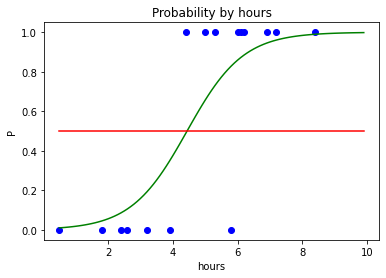

In [29]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_range, p, color = 'green')
plt.plot(X_range, np.full(len(X_range), 0.5), color = 'red')
# np.full(len(X_range), 0.5) : X_range 개수만큼 0.5로 가득찬 배열 만들기
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

### 데이터 시각화 (테스트 세트)

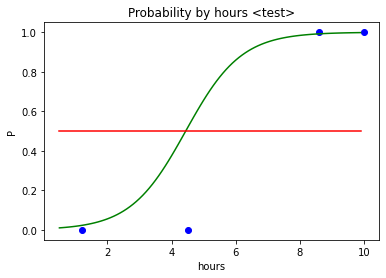

In [30]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_range, p, color = 'green')
plt.plot(X_range, np.full(len(X_range), 0.5), color = 'red')
# np.full(len(X_range), 0.5) : X_range 개수만큼 0.5로 가득찬 배열 만들기
plt.title('Probability by hours <test>')
plt.xlabel('hours')
plt.ylabel('P')
plt.show()

In [31]:
classifier.predict_proba([[4.5]])   # 4.5시간 공부했을 때 확률 (모델에서는 약 51%의 확률로 합격 예측, 실제로는 불합격)
# 불합격 확률 48%, 합격 확률 51%

array([[0.48310686, 0.51689314]])

## 혼동 행렬 (Confusion Matrix)

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)   # 실제 데이터와 예측 데이터를 입력변수로 
cm

# 실제 값과 예측 값을 보다 쉽게 확인할 수 있게 해줌


# ------------------혼동 행렬-------------------------

# TRUE NEGATIVE (TN)         FALSE POSITIVE (FP)
# 불합격일거야(예측)         합격일거야(예측)
# 불합격(실제)               불합격(실제)
# 옳은 예측                  틀린 예측
# 1개                        1개

# FALSE NEGATIVE (FN)        TRUE POSITIVE (TP)
# 불합격일거야(예측)         합격일거야(예측)
# 합격(실제)                 합격(실제)
# 틀린 예측                  옳은 예측
# 0개                        2개


array([[1, 1],
       [0, 2]], dtype=int64)

혼동행렬 예시  

구글 -> confusion matrix pregnancy 검색 -> 이미지